In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install torch==2.3.1 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 81.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 67.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 9.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━

In [2]:
!pip install torchvision>=0.18.1

In [2]:
!pip install torchvision --upgrade

  Using cached torchvision-0.19.1-cp310-cp310-manylinux1_x86_64.whl.metadata (6.0 kB)
  Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached triton-3.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.3 kB)
Using cached torchvision-0.19.1-cp310-cp310-manylinux1_x86_64.whl (7.0 MB)
Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl (797.1 MB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 7.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: triton
    Found existing installation: triton 2.3.1
    Uninstalling triton-2.3.1:
      Successfully uninstalled triton-2.3.1
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 8.9.2.26
    Uninstalling nvidia-cudnn-cu12-8.9.2.26:
      Successfu

In [1]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

2.4.1+cu121
0.19.1+cu121


In [2]:
!git clone https://github.com/facebookresearch/segment-anything-2.git

Cloning into 'segment-anything-2'...
remote: Enumerating objects: 945, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 945 (delta 3), reused 3 (delta 1), pack-reused 936 (from 1)
Receiving objects: 100% (945/945), 128.92 MiB | 38.70 MiB/s, done.
Resolving deltas: 100% (320/320), done.


In [3]:
!pip install -e /kaggle/working/segment-anything-2

Obtaining file:///kaggle/working/segment-anything-2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.4 MB/s eta 0:00:00
  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=SAM_2-1.0-0.editable-cp310-cp310-linux_x86_64.whl size=13405 sha256=c4a6c5a6b82652fce1e743414a7653dc6b1f9e4e7e0fb6d4dfbff7e36f93fab4
  Stored in directory: /tmp/pip-ephem-wheel-cache-7yasubef/wheels/1b/30/72/94667a625e111d514f83ac75152c8957c764a2c

In [4]:
!cd /kaggle/working/segment-anything-2/checkpoints && ./download_ckpts.sh && cd ..

--2024-10-03 20:28:01--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.108, 3.163.189.96, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: 'sam2.1_hiera_tiny.pt'

sam2.1_hiera_tiny.p 100%[===================>] 148.78M   175MB/s    in 0.8s    

2024-10-03 20:28:02 (175 MB/s) - 'sam2.1_hiera_tiny.pt' saved [156008466/156008466]

--2024-10-03 20:28:02--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.96, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184416285 (176M) [applic

In [5]:
import os

# Set the directory path
directory_path = '/kaggle/working/segment-anything-2/checkpoints'

# List the files in the directory
files = os.listdir(directory_path)

# Display the files
for file in files:
    print(file)

sam2.1_hiera_small.pt
sam2.1_hiera_large.pt
sam2.1_hiera_base_plus.pt
sam2.1_hiera_tiny.pt
download_ckpts.sh


In [2]:
import torch
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator
from sam2.sam2_image_predictor import SAM2ImagePredictor
from sam2.build_sam import build_sam2_video_predictor
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os,glob,shutil
import matplotlib.patches as patches

In [3]:
checkpoint = "/kaggle/working/segment-anything-2/checkpoints/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"
predictor_prompt = SAM2ImagePredictor(build_sam2(model_cfg, checkpoint))
sam2 = build_sam2(model_cfg, checkpoint, device='cuda', apply_postprocessing=False)
mask_generator = SAM2AutomaticMaskGenerator(sam2)
predictor_vid = build_sam2_video_predictor(model_cfg, checkpoint, device='cuda')
tempfolder = "./tempdir"

In [4]:
def create_if_not_exists(dirname):
    if not os.path.exists(dirname):
        os.mkdir(dirname)
def cleardir(tempfolder):
    filepaths = glob.glob(tempfolder+"/*")
    for filepath in filepaths:
        os.unlink(filepath)
        
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1,-1)
    ax.imshow(mask_image)
def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size)
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2]- box[0], box[3]- box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0,0, 0.2)))

In [5]:
def process_img_png_mask(imgpath, maskpath, visualize=False):
    # Load the image and mask
    img = Image.open(imgpath)
    mask = Image.open(maskpath)
    
    # Convert mask to numpy array
    mask_np = np.array(mask)

    # Find coordinates of the non-zero pixels (mask region)
    nonzero_coords = np.argwhere(mask_np > 0)

    # Get bounding box coordinates
    ymin, xmin = nonzero_coords.min(axis=0)
    ymax, xmax = nonzero_coords.max(axis=0)

    if visualize:
        # Visualize the image with bounding box
        fig, ax = plt.subplots(1)
        ax.imshow(img)

        # Create a Rectangle patch for the bounding box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.title("Image with Bounding Box from Mask")
        plt.show()

    return [xmin, xmax, ymin, ymax]


In [6]:
def track_item_boxes(imgpath1, imgpath2, img1boxclasslist, visualize=True):
    create_if_not_exists(tempfolder)
    cleardir(tempfolder)
    shutil.copy(imgpath1, tempfolder + "/00000.jpg")
    shutil.copy(imgpath2, tempfolder + "/00001.jpg")
    
    inference_state = predictor_vid.init_state(video_path="./tempdir")
    predictor_vid.reset_state(inference_state)
    
    ann_frame_idx = 0
    for img1boxclass in img1boxclasslist:
        ([xmin, xmax, ymin, ymax], objectnumint) = img1boxclass
        box = np.array([xmin, ymin, xmax, ymax], dtype=np.float32)
        _, out_obj_ids, out_mask_logits = predictor_vid.add_new_points_or_box(
            inference_state=inference_state,
            frame_idx=ann_frame_idx,
            obj_id=objectnumint,
            box=box,
        )
    
    video_segments = {}  # video_segments contains the per-frame segmentation results
    
    # Now we call propagate_in_video() with the inference_state
    for out_frame_idx, out_obj_ids, out_mask_logits in predictor_vid.propagate_in_video(inference_state):
        video_segments[out_frame_idx] = {
            out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
            for i, out_obj_id in enumerate(out_obj_ids)
        }
    
    if visualize:
        fig, ax = plt.subplots()
        plt.title("Original Image")
        ax.imshow(Image.open(tempfolder + "/00000.jpg"))
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.show()
        
        out_frame_idx = 1
        plt.figure(figsize=(6, 4))
        plt.title(f"detected object in test image ::")
        plt.imshow(Image.open(tempfolder + "/00001.jpg"))
        for out_obj_id, out_mask in video_segments[out_frame_idx].items():
            show_mask(out_mask, plt.gca(), obj_id=out_obj_id)
    
    return video_segments


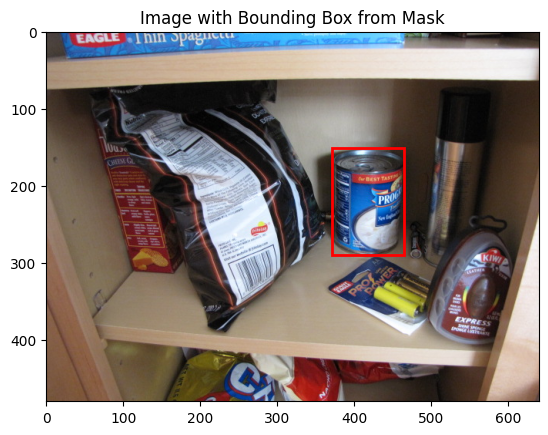

In [8]:
firstimgpath = '/kaggle/input/parallel-dots-dataset/CMU10_3D/data_2D/can_chowder_000001.jpg'
firstimgmaskpath = '/kaggle/input/parallel-dots-dataset/CMU10_3D/data_2D/can_chowder_000001_1_gt.png'
[xmin,xmax,ymin,ymax] = process_img_png_mask(firstimgpath,firstimgmaskpath,visualize=True)

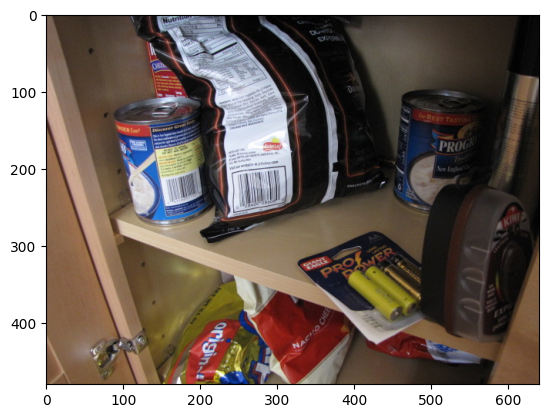

In [12]:
secondimgpath = '/kaggle/input/parallel-dots-dataset/CMU10_3D/data_2D/can_chowder_000005.jpg'
secondimg = Image.open(secondimgpath)
plt.imshow(secondimg)
plt.show()

propagate in video: 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]


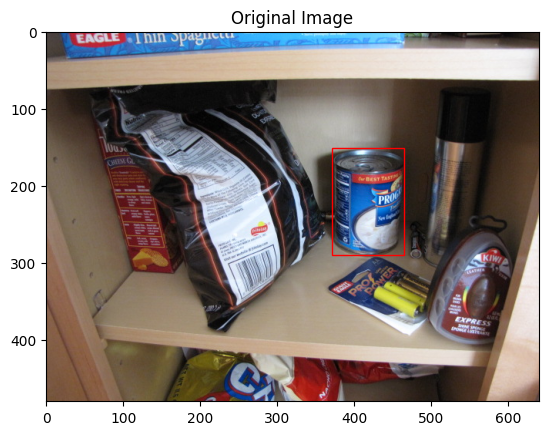

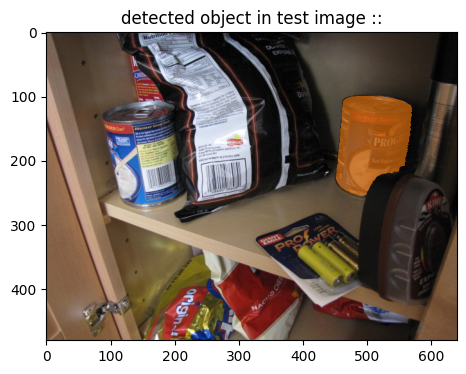

In [13]:
op = track_item_boxes(firstimgpath,secondimgpath,[([xmin,xmax,ymin,ymax],1)],visualize=True)

In [ ]:
1.

In [39]:
import os
import glob
import shutil
import csv
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Directory where your images and masks are located
img_dir = '/kaggle/input/parallel-dots-dataset/CMU10_3D/data_2D'

# Temp folder for processing
tempfolder = "./tempdir"

# Create temp folder if not exists
def create_if_not_exists(dirname):
    if not os.path.exists(dirname):
        os.mkdir(dirname)

# Clear temp folder
def cleardir(tempfolder):
    filepaths = glob.glob(tempfolder + "/*")
    for filepath in filepaths:
        os.unlink(filepath)

# Save bounding box coordinates to a CSV file
def save_boxes_to_csv(boxes, img_name, csv_path="bounding_boxes.csv"):
    with open(csv_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        for box in boxes:
            writer.writerow([img_name, *box])

# Process image and mask to extract multiple bounding boxes
def process_img_png_mask(imgpath, maskpath, padding=5, visualize=False, output_path=None):
    img = Image.open(imgpath)
    mask = Image.open(maskpath)

    # Convert mask to numpy array
    mask_np = np.array(mask)

    # Find unique object labels in the mask
    unique_labels = np.unique(mask_np)

    boxes = []
    for label in unique_labels:
        if label == 0:  # Skip background
            continue

        # Find coordinates of the current object's pixels
        nonzero_coords = np.argwhere(mask_np == label)

        # Get bounding box coordinates
        ymin, xmin = nonzero_coords.min(axis=0)
        ymax, xmax = nonzero_coords.max(axis=0)

        # Add padding to bounding box
        xmin = max(0, xmin - padding)
        ymin = max(0, ymin - padding)
        xmax = min(mask_np.shape[1], xmax + padding)
        ymax = min(mask_np.shape[0], ymax + padding)

        boxes.append([xmin, xmax, ymin, ymax])

    if visualize:
        fig, ax = plt.subplots(1)
        ax.imshow(img)
        for box in boxes:
            rect = patches.Rectangle((box[0], box[2]), box[1] - box[0], box[3] - box[2], linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        plt.title("Image with Bounding Boxes from Mask")

        if output_path:
            plt.savefig(output_path)
        plt.show()

    return boxes

# Function to track multiple item boxes
def track_item_boxes(imgpath1, imgpath2, img1boxclasslist, visualize=True):
    create_if_not_exists(tempfolder)
    cleardir(tempfolder)
    shutil.copy(imgpath1, tempfolder + "/00000.jpg")
    shutil.copy(imgpath2, tempfolder + "/00001.jpg")

    inference_state = predictor_vid.init_state(video_path=tempfolder)
    predictor_vid.reset_state(inference_state)

    ann_frame_idx = 0
    for img1boxclass in img1boxclasslist:
        ([xmin, xmax, ymin, ymax], objectnumint) = img1boxclass
        box = np.array([xmin, ymin, xmax, ymax], dtype=np.float32)
        _, out_obj_ids, out_mask_logits = predictor_vid.add_new_points_or_box(
            inference_state=inference_state,
            frame_idx=ann_frame_idx,
            obj_id=objectnumint,
            box=box,
        )

    video_segments = {}  # Store the segmentation results
    detected_boxes = {}  # Store the detected bounding boxes

    # Propagate masks in video
    for out_frame_idx, out_obj_ids, out_mask_logits in predictor_vid.propagate_in_video(inference_state):
        video_segments[out_frame_idx] = {
            out_obj_id: (out_mask_logits[i] > 0.1).cpu().numpy()
            for i, out_obj_id in enumerate(out_obj_ids)
        }

        # Calculate bounding box coordinates for detected objects in the second image
        if out_frame_idx == 1:
            for out_obj_id, out_mask in video_segments[out_frame_idx].items():
                out_mask_gray = (out_mask.squeeze() * 255).astype(np.uint8)
                out_mask_eroded = cv2.erode(out_mask_gray, np.ones((3, 3)), iterations=1)
                contours, _ = cv2.findContours(out_mask_eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                for contour in contours:
                    x, y, w, h = cv2.boundingRect(contour)
                    if out_obj_id not in detected_boxes:
                        detected_boxes[out_obj_id] = []
                    detected_boxes[out_obj_id].append([x, x + w, y, y + h])

    return video_segments, detected_boxes

# Get list of all unique object types in the folder (based on filename patterns)
def get_object_types(img_dir):
    filenames = glob.glob(os.path.join(img_dir, "*_000001.jpg"))
    object_types = set([os.path.basename(f).split("_000001.jpg")[0] for f in filenames])
    return object_types

# Main processing function to iterate over all images in a folder
def process_folder(img_dir):
    object_types = get_object_types(img_dir)

    for obj_type in object_types:
        # Get the first image and its mask
        first_img = os.path.join(img_dir, f"{obj_type}_000001.jpg")
        first_mask = os.path.join(img_dir, f"{obj_type}_000001_1_gt.png")

        # Extract boxes from the first image using its mask
        boxes = process_img_png_mask(first_img, first_mask, padding=10, visualize=False)
        object_classes = [(box, i + 1) for i, box in enumerate(boxes)]

        # Iterate through all subsequent images of this object type
        img_paths = sorted(glob.glob(os.path.join(img_dir, f"{obj_type}_*.jpg")))

        for img_path in img_paths[1:]:  # Skip the first image
            # Predict masks and track objects
            _, detected_boxes = track_item_boxes(first_img, img_path, object_classes, visualize=False)

            # Save detected boxes for this image
            save_boxes_to_csv(detected_boxes.values(), os.path.basename(img_path))

# Run the folder processing
process_folder(img_dir)


propagate in video: 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]


In [ ]:
#To see all the bounding boxes you can run this code 

import csv
import os
import ast
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Path to your images and the CSV file
img_dir = '/kaggle/input/parallel-dots-dataset/CMU10_3D/data_2D'  # Change this to the actual path where your images are
csv_file = '/kaggle/working/bounding_boxes.csv'  # CSV file with bounding box coordinates

# Function to plot bounding boxes on an image
def plot_bounding_boxes(image_path, boxes):
    img = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Plot each bounding box
    for box in boxes:
        xmin, xmax, ymin, ymax = box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.title(f"Bounding boxes for {os.path.basename(image_path)}")
    plt.axis('off')  # Remove axis for better visualization
    plt.show()

# Read bounding boxes from the CSV file
with open(csv_file, newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        img_name = row[0]  # Image file name
        raw_boxes = row[1:]  # Bounding boxes as strings

        # Convert the string representation of boxes to a list of lists
        boxes = [ast.literal_eval(box) for box in raw_boxes]

        # Path to the image
        img_path = os.path.join(img_dir, img_name)

        # Plot the bounding boxes on the image
        plot_bounding_boxes(img_path, boxes)


In [ ]:
2.

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Path to the folder containing masked images
folder_path = '/kaggle/input/parallel-dots-dataset/CMU10_3D/data_2D'

# List to store coordinates for each image
all_coordinates = []

# Loop through all files in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith('_gt.png'):  # Check for masked images
        mask_image_path = os.path.join(folder_path, filename)

        # Load the image
        mask_image = cv2.imread(mask_image_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding to create a binary mask
        _, binary_mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Find contours in the binary mask
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Extract coordinates for each contour
        image_coordinates = []
        for contour in contours:
            # Get the bounding box for each contour
            x, y, w, h = cv2.boundingRect(contour)
            image_coordinates.append([filename, x, x + w, y, y + h])  # [filename, xmin, xmax, ymin, ymax]

        # Append the coordinates for the current image
        all_coordinates.extend(image_coordinates)

        # Optional: Draw contours on the original image for visualization
        contour_image = mask_image.copy()
        cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green contours

        # Display the original masked image with contours
        #plt.figure(figsize=(10, 10))
        #plt.subplot(1, 2, 1)
        #plt.imshow(cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB))
        #plt.title(f"Original Masked Image: {filename}")
        #plt.axis('off')

        #plt.subplot(1, 2, 2)
        #plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
        #plt.title("Contours on Masked Image")
        #plt.axis('off')

        #plt.show()  # Do unhash if you want to see

# Convert the collected coordinates to a DataFrame and save to CSV
coordinates_df = pd.DataFrame(all_coordinates, columns=['filename', 'xmin', 'xmax', 'ymin', 'ymax'])
coordinates_df.to_csv('/kaggle/working/extracted_coordinates.csv', index=False)

print("Coordinates extracted and saved to extracted_coordinates.csv")


Coordinates extracted and saved to extracted_coordinates.csv


In [33]:
import cv2
import os
import pandas as pd

# Path to the folder containing masked images
folder_path = '/kaggle/input/parallel-dots-dataset/CMU10_3D/data_2D'

# List to store coordinates for each image
all_coordinates = []

# Loop through all files in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith('_gt.png'):  # Check for masked images
        mask_image_path = os.path.join(folder_path, filename)

        # Load the image
        mask_image = cv2.imread(mask_image_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding to create a binary mask
        _, binary_mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Find contours in the binary mask
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Extract coordinates for each contour
        for contour in contours:
            # Get the bounding box for each contour
            x, y, w, h = cv2.boundingRect(contour)
            bbox = f"[{x}, {x + w}, {y}, {y + h}]"  # Format as [xmin, xmax, ymin, ymax]
            all_coordinates.append([filename, bbox])  # [filename, bbox]

# Convert the collected coordinates to a DataFrame and save to CSV
coordinates_df = pd.DataFrame(all_coordinates, columns=['filename', 'bbox'])
coordinates_df.to_csv('/kaggle/working/extracted_coordinates.csv', index=False)

print("Coordinates extracted and saved to extracted_coordinates.csv")


Coordinates extracted and saved to formatted_extracted_coordinates.csv


In [40]:
import csv

# Input and output file paths
input_file = '/kaggle/working/bounding_boxes.csv'
output_file = 'formatted_bounding_boxes.csv'

# Open the input and output CSV files
with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        file_name = row[0]  # First element is the file name
        coordinates = row[1:]  # Remaining elements are the coordinates

        # Write each coordinate on a new line with the same file name
        for coord in coordinates:
            writer.writerow([file_name, coord])

print(f"Transformation complete! Check '{output_file}' for the output.")


Transformation complete! Check 'formatted_bounding_boxes.csv' for the output.


In [ ]:
import csv
import ast
import re

# Function to check if two bounding boxes are "close enough"
def is_close(bbox1, bbox2, threshold=10):
    close_count = sum(abs(bbox1[i] - bbox2[i]) <= threshold for i in range(4))
    return close_count >= 3  # Require at least 3 out of 4 dimensions to be within threshold

# Paths to the two CSV files
bounding_boxes_file = '/kaggle/working/formatted_bounding_boxes.csv'
extracted_coordinates_file = '/kaggle/working/extracted_coordinates.csv'
unmatched_file_path = '/kaggle/working/unmatched.csv'  # Path for unmatched filenames
nofile_path = '/kaggle/working/nofile.csv'  # Path for nofile images

# Load bounding boxes from formatted_bounding_boxes.csv
bounding_boxes = []
with open(bounding_boxes_file, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        filename = row[0]
        bbox = ast.literal_eval(row[1])  # Convert the string "[x1, x2, y1, y2]" to a list
        bounding_boxes.append((filename, bbox))

# Load extracted coordinates from formatted_extracted_coordinates.csv
extracted_coords = []
with open(extracted_coordinates_file, 'r') as f:
    reader = csv.reader(f)
    next(reader)  # Skip header
    for row in reader:
        filename = row[0]
        bbox = ast.literal_eval(row[1])  # Convert the string "[x1, x2, y1, y2]" to a list
        extracted_coords.append((filename, bbox))

# Compare bounding boxes with extracted coordinates
matches = []
unmatched = []
threshold = 10  # Tolerance in pixels for closeness

# Open the unmatched and nofile files for writing
with open(unmatched_file_path, 'w', newline='') as f_unmatched, open(nofile_path, 'w', newline='') as f_nofile:
    writer_unmatched = csv.writer(f_unmatched)
    writer_nofile = csv.writer(f_nofile)
    writer_unmatched.writerow(['Unmatched Extracted Coord File', 'Extracted BBox'])  # Header
    writer_nofile.writerow(['Nofile Extracted Coord File', 'Extracted BBox'])  # Header

    # Iterate over each extracted coordinate
    for extracted_entry in extracted_coords:
        filename_extracted, extracted_bbox = extracted_entry
        
        # Extract the relevant portion of the extracted filename
        match_name = re.sub(r'(_\d+_gt)?\.png$', '', filename_extracted)  # Extract juicebox_000002
        
        # Debugging output
        print(f"Searching for matches for: {match_name}")

        match_found = False
        close_match_found = False

        for bbox_entry in bounding_boxes:
            filename_bbox, bbox = bbox_entry
            
            # Check if the bounding box filename contains the relevant name
            if match_name in filename_bbox:
                match_found = True  # The filename exists in bounding boxes
                # Check for closeness
                if is_close(bbox, extracted_bbox, threshold):
                    matches.append((filename_bbox, bbox, filename_extracted, extracted_bbox))
                    close_match_found = True
                    break  # Exit the loop as a close match has been found

        # Handle results based on whether matches were found
        if not match_found:
            # If the filename does not exist at all in the bounding boxes
            writer_nofile.writerow([filename_extracted, extracted_bbox])  # Add to nofile file
        elif not close_match_found:
            # If the filename exists but no close match is found
            writer_unmatched.writerow([filename_extracted, extracted_bbox])  # Add to unmatched file

# Save matches to CSV
matches_file_path = '/kaggle/working/matched.csv'
with open(matches_file_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Extracted Coord File', 'Extracted BBox', 'Bounding Box File', 'Bounding Box'])  # Header
    for match in matches:
        writer.writerow([match[2], match[3], match[0], match[1]])

# Output file paths
print(f"Matches saved to: {matches_file_path}")
print(f"Unmatched filenames saved to: {unmatched_file_path}")
print(f"Nofile images saved to: {nofile_path}")


In [42]:
import csv
import pandas as pd
import re  # Regular expressions for pattern matching

# Path to the matches, unmatched, and no-file CSV files
matches_file_path = '/kaggle/working/matched.csv'
unmatched_file_path = '/kaggle/working/unmatched.csv'
no_file_path = '/kaggle/working/nofile.csv'

# Final cleaned CSV file path
final_cleaned_file_path = '/kaggle/working/final_cleaned_filenames.csv'

# Function to process matches and save directly to a list
def process_matches(file_path, label):
    rows = []
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        next(reader)  # Skip the header
        
        for row in reader:
            extracted_coord_file = row[0]  # Extracted Coord File
            rows.append([extracted_coord_file, label])  # Append filename and label to list
    return rows

# Combine all matches into one list
all_rows = []
all_rows.extend(process_matches(matches_file_path, 'match'))
all_rows.extend(process_matches(unmatched_file_path, 'unmatch'))
all_rows.extend(process_matches(no_file_path, 'nofile'))

# Sort the rows by the filename (assuming filename is in the first column)
all_rows.sort(key=lambda x: x[0])

# Create a DataFrame from the combined list
df = pd.DataFrame(all_rows, columns=['Filename', 'Label'])

# Remove the instance-specific part (_000005_1_gt.png) and numeric identifiers
df['Filename'] = df['Filename'].apply(lambda x: re.sub(r'(_\d+.*|\_\d+|_gt)', '', x) + '.png')

# Save the cleaned DataFrame to the final CSV file
df.to_csv(final_cleaned_file_path, index=False)

# Show the updated DataFrame for verification
print("Distinct filenames after cleaning:")
distinct_filenames = df['Filename'].unique()
for filename in distinct_filenames:
    print(filename)

print(f"Final cleaned filenames saved to: {final_cleaned_file_path}")


Distinct filenames after cleaning:
can_chowder.png
can_soymilk.png
can_tomatosoup.png
carton_oj.png
carton_soymilk.png
diet_coke.png
hc_potroastsoup.png
juicebox.png
rice_tuscan.png
ricepilaf.png
Final cleaned filenames saved to: /kaggle/working/final_cleaned_filenames.csv


In [ ]:
3.

In [43]:
import pandas as pd

# Load the cleaned DataFrame with filenames and labels
cleaned_filenames_path = '/kaggle/working/final_cleaned_filenames.csv'
df = pd.read_csv(cleaned_filenames_path)

# Initialize a list to hold the performance metrics for each object
performance_metrics = []

# Group by Filename
grouped = df.groupby('Filename')['Label'].value_counts().unstack(fill_value=0)

# Calculate performance metrics for each object
for filename, row in grouped.iterrows():
    TP = row.get('match', 0)
    FP = row.get('unmatch', 0)
    FN = row.get('nofile', 0)

    # Calculate Precision, Recall, and F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append results to the performance metrics list
    performance_metrics.append({
        'Filename': filename,
        'TP': TP,
        'FP': FP,
        'FN': FN,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    })

# Convert the list to a DataFrame
performance_df = pd.DataFrame(performance_metrics)

# Save the performance metrics to a new CSV file
performance_metrics_path = '/kaggle/working/object_detection_performance.csv'
performance_df.to_csv(performance_metrics_path, index=False)

# Display the performance metrics DataFrame
print(performance_df)


              Filename  TP  FP  FN  Precision    Recall  F1-Score
0      can_chowder.png  26  19  30   0.577778  0.464286  0.514851
1      can_soymilk.png  44  28   3   0.611111  0.936170  0.739496
2   can_tomatosoup.png  12  12  51   0.500000  0.190476  0.275862
3        carton_oj.png  32  25  18   0.561404  0.640000  0.598131
4   carton_soymilk.png  25  27  23   0.480769  0.520833  0.500000
5        diet_coke.png  41  26   8   0.611940  0.836735  0.706897
6  hc_potroastsoup.png  47  25   3   0.652778  0.940000  0.770492
7         juicebox.png  37  27  11   0.578125  0.770833  0.660714
8      rice_tuscan.png  26  21  28   0.553191  0.481481  0.514851
9        ricepilaf.png  29  42   4   0.408451  0.878788  0.557692
